In [4]:
%run util.py

# Exercise 6.4.4

ODE System

$$
\begin{align}
x' &= x(1- y) \\
y' &= y(\rho - x)
\end{align}
$$

Let's consider the fixed points first. From the first equation we get $x=0$ and $y=1$. Inserting $x=0$ into the second equation yields $0 = y \rho$ and from this follows $y = 0$. So there is one fixed point at $(0,0)$.
Inserting $y = 1$ into the second equation yields $0 = \rho - x$ and therefore the second fixed point is at $(\rho, 1)$.

Let's look at the fixed points and the trajectories.

In [5]:
rho = 2

In [6]:
def dX_dt(X, t=0):
    return np.array([X[0] - X[0]*X[1],
                     X[1] *(rho - X[0])])

Using `Norm = True` provides a better picture of fixed points - thereby we can verify the fixed points at $(0,0)$ and $(\rho, 1)$; using `Norm = False` provides a getter picture of the dynamics involved.

Anyway, the fixed point at $(0,0)$ is an instable point. Starting with $(\epsilon, 0)$ gives a blowup of the first species, starting with $(0, \epsilon)$ gives a blowup of the second species. This makes sense as every species has inifinte carrying capacity.

The second fixed point at $(\rho, 1)$, however, is also an instable saddle point. Small deviations from it lead to a blowup of one species and the exinction of the other.

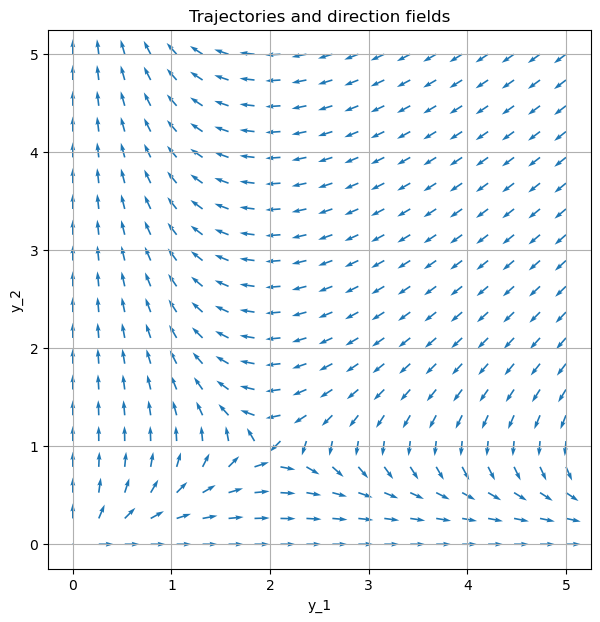

In [7]:
vField(0, 5, 0, 5, dX_dt, Norm = True)

In [30]:
tmax = 7
t = np.linspace(0, tmax, 200)
X, infodict = solveODE(dX_dt, [1.99, 0.99], t)
infodict['message']

'Integration successful.'

(0.0, 5.0)

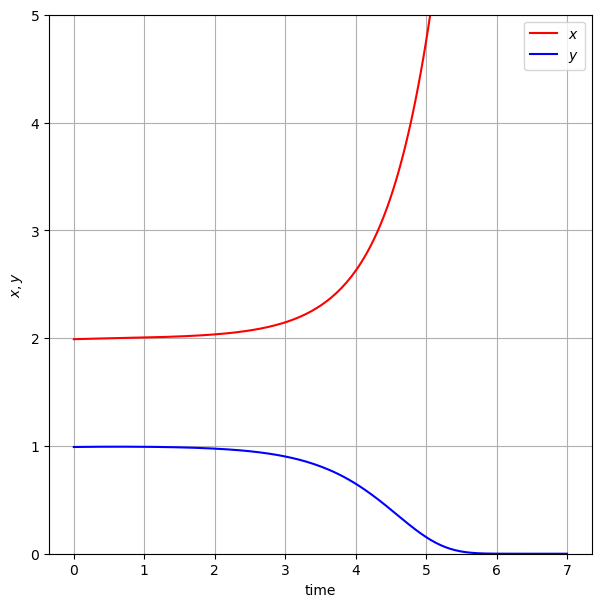

In [34]:
x, y = X.T

plt.plot(t, x, 'r-', label='$x$')
plt.plot(t, y  , 'b-', label='$y$')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('$x, y$')
plt.ylim([0,5])

# Exercise 6.4.5

Before we start, we consider a 1D case with a finite carrying capacity.

## 1D Model

That is, we consider

$$
x' = x(1 - x / K)
$$

Fixed points are $x=0$ and $x = K$.

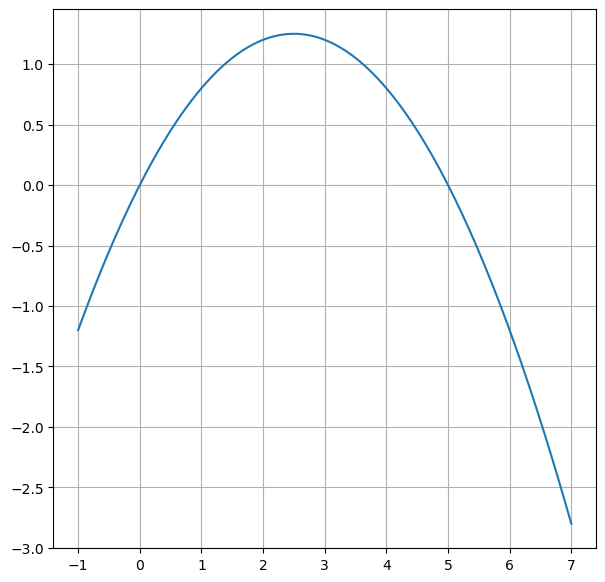

In [38]:
K = 5
x = np.linspace(-1, K+2, 200)
xprime = x*(1 - x/K)
plt.plot(x, xprime)
plt.grid(True)

In [43]:
def dX_dt(X, t=0):
    return np.array([X[0]*(1 - X[0] / K)])

In [54]:
tmax = 10
t = np.linspace(0, tmax, 200)
X, infodict = solveODE(dX_dt, [0.1], t)
#X, infodict = solveODE(dX_dt, [10.0], t)
infodict['message']

'Integration successful.'

Text(0, 0.5, '$x$')

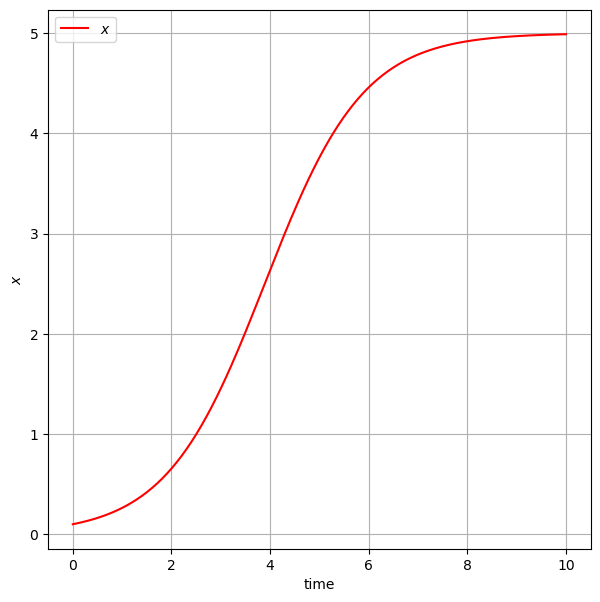

In [55]:
x = X

plt.plot(t, x, 'r-', label='$x$')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('$x$')

So every population $0 < x < K$ grows to $x = K$ and every population $K < x$ decreases to $x = K$.

## 2D Model

This model is asymmetric: Population $x$ has a carrying capacity of $K$, whereas population $y$ has no such constraint.

$$
\begin{align}
x' &= x(1-x/K) - b_1 xy \\
y' &= y - b_2 x y
\end{align}
$$

In [117]:
K = 8.
b1 = 0.1
b2 = 0.4

In [118]:
def dX_dt(X, t=0):
    return np.array([X[0]*(1 - X[0] / K) - b1*X[0]*X[1],
                     X[1] - b2 * X[0] * X[1]])

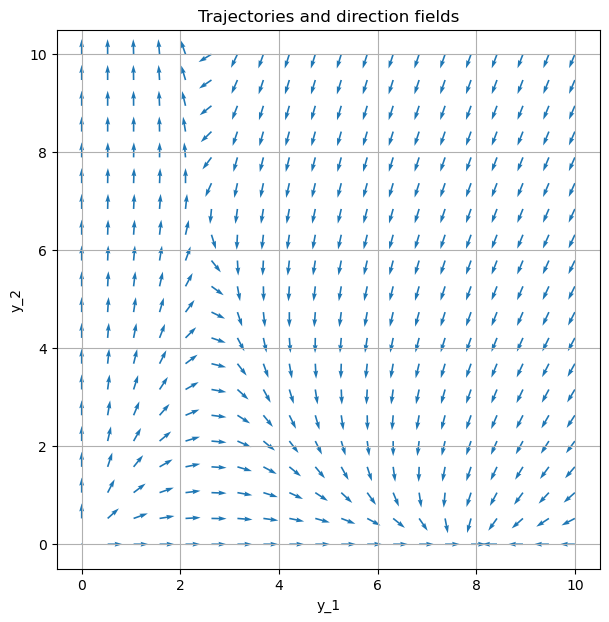

In [131]:
vField(0, 10, 0, 10, dX_dt, Norm = True)

A fixed point (the only one?) is at TODO: CHeck!!

$$
\left(\frac{1}{b_2}, \frac{b_2 K - 1}{b_1 b_2 K} \right)
$$

In [129]:
1/b2, (b2*K-1)/(b1*b2*K)

(2.5, 6.874999999999999)

In [136]:
tmax = 12
t = np.linspace(0, tmax, 200)
X, infodict = solveODE(dX_dt, [0.1, 0.2], t)
infodict['message']

'Integration successful.'

Text(0, 0.5, '$x, y$')

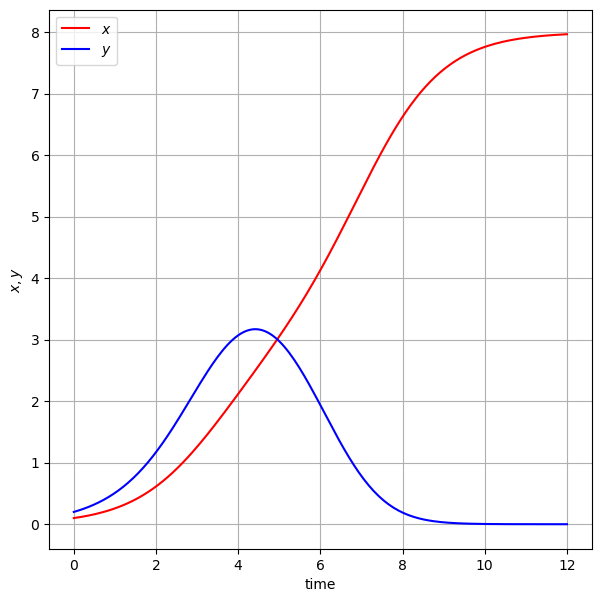

In [137]:
x, y = X.T

plt.plot(t, x, 'r-', label='$x$')
plt.plot(t, y  , 'b-', label='$y$')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('$x, y$')

# Exercise 6.4.6

$$
\begin{align}
x' &= x(1-x/K_1) - b_1 y \\
y' &= y(1-y/K_2) - b_2 x y
\end{align}
$$